Подключение к Метатрэйдер 5

In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2214, '14 Nov 2019']


Загрузка ценовых данных

In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(1971,1,1), datetime(2019,11,21))

Преобразование данных в пандас датафрейм

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d

,time,open,high,low,close,tick_volume,spread,real_volume
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0
...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0


вычисление средней цены бара

In [5]:
d['median']=(d['high']+d['low'])/2

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0,0.536900
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0,0.536600
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0,0.536500
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0,0.536800
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0,0.537100
...,...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310


Проверка ряда на стационарность

In [7]:
from incl import *

In [8]:
statc(d['median'].values)

adf:  -2.520483357770675
p-value:  0.11056971212659916
Critical values:  {'1%': -3.43087017142352, '5%': -2.86176989000953, '10%': -2.566892365468227}
есть единичные корни, ряд не стационарен


вычесление показателя Хёрста

In [9]:
dtl=d['median'].values
hurst(dtl)

0.5391513426750832

In [10]:
%matplotlib nbagg
import matplotlib.pyplot as plt

график функции распределения

<IPython.core.display.Javascript object>


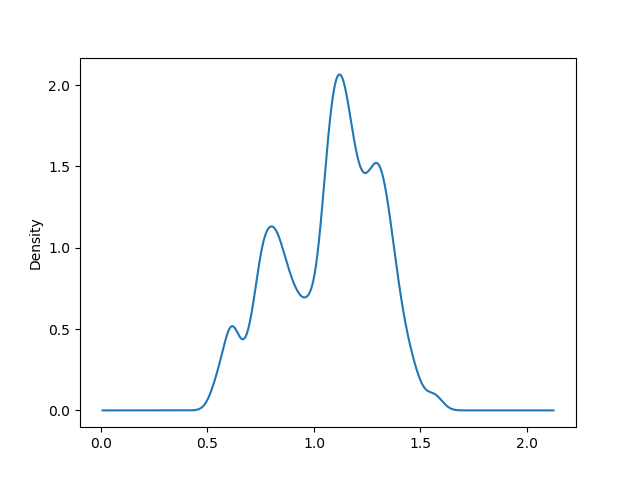

In [11]:
d['median'].plot.kde()

вычисление ряда приращений

In [12]:
d['delta'] = d['median'].diff(1).fillna(0)
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0,0.536900,0.000000
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0,0.536600,-0.000300
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0,0.536500,-0.000100
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0,0.536800,0.000300
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0,0.537100,0.000300
...,...,...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430


проверка на стационарность ряда приращений

In [13]:
statc(d['delta'].values)

adf:  -25.831260089702525
p-value:  0.0
Critical values:  {'1%': -3.4308701300495503, '5%': -2.8617698717258855, '10%': -2.5668923557359618}
единичных корней нет, ряд стационарен


вычесления показателя Хёрста

In [14]:
dtl=d['delta'].values
hurst(dtl)

0.0016815081616938215

график распределения

<IPython.core.display.Javascript object>


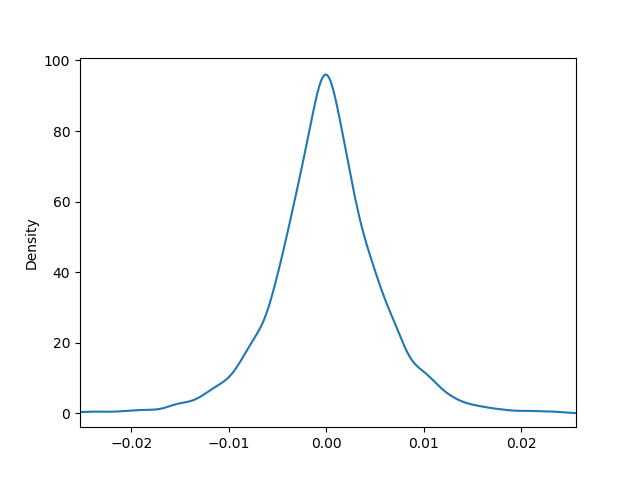

In [15]:
d['delta'].plot.kde()